In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('house_data.csv', index_col=0)
data.head(5)

date     price  bedrooms  bathrooms  sqft_living  \
id                                                                        
7129300520  20141013T000000  221900.0         3       1.00         1180   
6414100192  20141209T000000  538000.0         3       2.25         2570   
5631500400  20150225T000000  180000.0         2       1.00          770   
2487200875  20141209T000000  604000.0         4       3.00         1960   
1954400510  20150218T000000  510000.0         3       2.00         1680   

            sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
id                                                                             
7129300520      5650     1.0           0     0          3      7        1180   
6414100192      7242     2.0           0     0          3      7        2170   
5631500400     10000     1.0           0     0          3      6         770   
2487200875      5000     1.0           0     0          5      7        1050   
1954400510      8080     1.0           0     0          3      8        1680   

            sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
id                                                                             
7129300520              0      1955             0    98178  47.5112 -122.257   
6414100192            400      1951          1991    98125  47.7210 -122.319   
5631500400              0      1933             0    98028  47.7379 -122.233   
2487200875            910      1965             0    98136  47.5208 -122.393   
1954400510              0      1987             0    98074  47.6168 -122.045   

            sqft_living15  sqft_lot15  
id                                     
7129300520           1340        5650  
6414100192           1690        7639  
5631500400           2720        8062  
2487200875           1360        5000  
1954400510           1800        7503

In [9]:
def feature_scaling(x):
    x_mean = np.mean(x)
    x_std = np.std(x)
    output = (x - x_mean) / x_std
    
    return output

In [4]:
# The Predictor and the target variable
X1 = data['grade']
X2 = data['bathrooms']
X3 = data['lat']
X4 = data['sqft_living']
X5 = data['view']
Y = data['price']



# convert X and Y to numpy array
X1 = np.array(X1)
X2 = np.array(X2)
X3 = np.array(X3)
X4 = np.array(X4)
X5 = np.array(X5)
Y = np.array(Y)

# Make Scaling for the the features
X1_new = feature_scaling(X1, X1)
X2_new = feature_scaling(X2, X2)
X3_new = feature_scaling(X3, X3)
X4_new = feature_scaling(X4, X4)
X5_new = feature_scaling(X5, X5)

features_list = [X1_new, X2_new, X3_new, X4_new, X5_new]

# Cost Function Equation
<div>

</div>

In [5]:
def hypothesis(*args):
    nums = args[0]
    hypo = nums[0]
    for i in range(1, len(nums)):
        hypo += nums[i] * features_list[i-1]
    return hypo

In [6]:
# calculate the cost function for the predcitor
def cost_func(hypo, y, m, X):
    sum_mean = 0.0
    for i in range(m):
        if len(X) == 1:
            sum_mean += (hypo[i] - y[i])
        else:
            sum_mean += (hypo[i] - y[i]) * X[i]
    sum_mean =  sum_mean / (m)
    return sum_mean

In [7]:
def square_error(hypo, y, m):
    sum_mean = 0.0
    for i in range(m):
        sum_mean += (hypo[i] - y[i]) ** 2
    sum_mean = float("{:.2f}".format(sum_mean / (2 * m)))
    return sum_mean

In [25]:
theta_list = [0,0,0,0,0,0]
tmps = []
learning_rate = 0.01
errors = []

for i in range(600):
    hypo = hypothesis(theta_list)
    tmps.append(theta_list[0] - learning_rate * cost_func(hypo, Y, Y.size, [1]))
    for i in range(1, len(theta_list)):
        tmps.append(theta_list[i] - learning_rate * cost_func(hypo , Y, Y.size, features_list[i - 1]))
    theta_list.clear()
    for i in tmps:
        theta_list.append(i)
    tmps.clear()
    errors.append(square_error(hypo, Y, Y.size))
    #print("Error" , error)
    #print(f"The new theta list {theta_list}")

#plt.xlabel("X")
#plt.ylabel("Y")
#plt.title("Real vs predicted values")
#plt.scatter(X, Y, color='r')
#plt.plot(X, theta_0 + theta_1 * X)
#plt.show()


Text(0, 0.5, 'Cost Function')

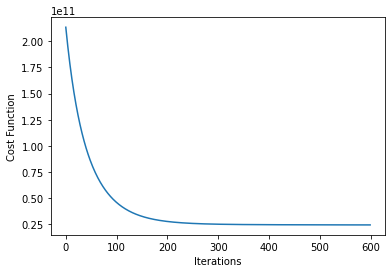

In [26]:
plt.plot(np.arange(600), errors)
plt.xlabel('Iterations')
plt.ylabel('Cost Function')

In [27]:
x1 = feature_scaling(X1)
x2 = feature_scaling(X2)
x3 = feature_scaling(X3)
x4 = feature_scaling(X4)
x5 = feature_scaling(X5)

features = [x1, x2, x3, x4, x5]
predicted = theta_list[0]

for i in range(1, len(theta_list)):
    predicted += theta_list[i] * features[i - 1]

data['predicted'] = predicted
data.head()

date     price  bedrooms  bathrooms  sqft_living  \
id                                                                        
7129300520  20141013T000000  221900.0         3       1.00         1180   
6414100192  20141209T000000  538000.0         3       2.25         2570   
5631500400  20150225T000000  180000.0         2       1.00          770   
2487200875  20141209T000000  604000.0         4       3.00         1960   
1954400510  20150218T000000  510000.0         3       2.00         1680   

            sqft_lot  floors  waterfront  view  condition  ...  sqft_above  \
id                                                         ...               
7129300520      5650     1.0           0     0          3  ...        1180   
6414100192      7242     2.0           0     0          3  ...        2170   
5631500400     10000     1.0           0     0          3  ...         770   
2487200875      5000     1.0           0     0          5  ...        1050   
1954400510      8080     1.0           0     0          3  ...        1680   

            sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
id                                                                             
7129300520              0      1955             0    98178  47.5112 -122.257   
6414100192            400      1951          1991    98125  47.7210 -122.319   
5631500400              0      1933             0    98028  47.7379 -122.233   
2487200875            910      1965             0    98136  47.5208 -122.393   
1954400510              0      1987             0    98074  47.6168 -122.045   

            sqft_living15  sqft_lot15      predicted  
id                                                    
7129300520           1340        5650  278639.059785  
6414100192           1690        7639  643978.799274  
5631500400           2720        8062  278265.179733  
2487200875           1360        5000  415082.970560  
1954400510           1800        7503  518824.199542  

[5 rows x 21 columns]